<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">   
    <p style="color: white;"> Importing Libraries 📚  </p>
</div>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
from scipy import stats
from scipy.stats import skew
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">   
    <p style="color: white;">  Read Data  </p>
</div>

In [2]:
october_df = pd.read_csv('Data 1.csv')
Novmber_df = pd.read_csv('Data 2.csv')
combined_df = pd.concat([october_df, Novmber_df], ignore_index=True)


<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">   
    <p style="color: white;"> Take A Look Over Data   </p>
</div>

In [3]:
combined_df.sample(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
6736574,2019-11-20 11:10:20 UTC,cart,5788125,1487580005754995573,NaN,NaN,4.92,567837147,eeaf6848-c73b-4718-b995-fcc6dea5dbb6
8000318,2019-11-27 00:39:45 UTC,remove_from_cart,5550042,1487580005595612013,NaN,NaN,3.00,500959640,65d63b31-3adc-461d-a1d2-7fb9d7b5b9f5
7323776,2019-11-23 04:12:39 UTC,view,5857864,1487580011627020412,NaN,levrana,8.92,575239766,176bf7bd-5e73-4340-860f-ca3a20464d8b
1856587,2019-10-14 08:56:14 UTC,purchase,5787242,1487580005050352469,NaN,haruyama,4.76,520053416,a72914ec-dd7b-4e38-bee4-a0cd17d4f66f
7950043,2019-11-26 15:41:36 UTC,cart,5774863,1487580005671109489,NaN,masura,3.95,526244388,9762bd53-21e0-4102-9404-9b57823b603a
662053,2019-10-05 18:53:46 UTC,view,5892179,1487580013950664926,NaN,NaN,18.89,557140272,e2e633f2-a65c-4c92-89fb-b24cef499e8d
7908153,2019-11-26 10:23:02 UTC,remove_from_cart,5844384,1487580006317032337,NaN,NaN,2.38,492774587,35e159e8-1fef-418b-a830-2fdd2bf605c9
3059962,2019-10-23 15:38:50 UTC,purchase,5888122,1487580013522845895,NaN,shik,7.78,425744492,75bea0c0-f4fd-4f47-a119-c020387a1c34
5754790,2019-11-12 22:10:53 UTC,purchase,5808301,1487580005511725929,NaN,NaN,5.00,554536014,4ebec993-df04-433e-ac60-2c7acbf8b388
6811702,2019-11-20 21:04:39 UTC,cart,5842141,1487580006317032337,NaN,NaN,1.59,568891061,8bf7cd62-54fb-403e-b02e-faf959d25597


In [4]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8738120 entries, 0 to 8738119
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 600.0+ MB


In [5]:
combined_df.sample(9)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
7362540,2019-11-23 09:17:25 UTC,view,5032,1487580008145748965,NaN,runail,0.92,444968192,039a2f36-64e2-4577-9645-a69c32b608af
2474464,2019-10-18 21:21:48 UTC,remove_from_cart,5773606,1487580006317032337,NaN,irisk,1.59,553964934,3b31add5-05a9-86bb-c2c9-eae6eeb14204
3857745,2019-10-30 03:19:19 UTC,cart,5801126,1487580005486560104,NaN,irisk,3.65,565066090,df470b9e-5abe-4e2f-8638-abb915f813ce
7322,2019-10-01 04:59:44 UTC,cart,5848407,1487580007675986893,NaN,freedecor,0.79,463647777,026eb980-bcef-42bd-ab36-59ea11718cc4
4254640,2019-11-02 10:39:45 UTC,cart,5724663,1487580005427839846,NaN,irisk,2.48,525970802,c7e719b7-ef39-4860-a111-93453bd11bee
8300156,2019-11-28 16:55:13 UTC,cart,5875320,1487580010100293687,NaN,NaN,0.79,282044838,fdd6a83e-41c1-465b-ba1b-c05ba449e239
1581310,2019-10-11 19:34:07 UTC,view,5852100,1924049106385240809,NaN,NaN,4.13,522275982,a0c99a50-28f7-4915-ba64-ed9655457a73
7887191,2019-11-26 07:27:28 UTC,view,5816176,1602943681873052386,NaN,grattol,5.24,574406416,a00c32bc-a3ba-4944-ae21-0f73a9b5371a
1163020,2019-10-08 16:13:51 UTC,remove_from_cart,5808325,1487580013858390233,NaN,kapous,3.49,531342469,1cfdf730-fcfb-4cf4-a349-464ef91f559c


In [6]:
combined_df['event_type'].value_counts()

event_type
view                3938296
cart                2544192
remove_from_cart    1687591
purchase             568041
Name: count, dtype: int64

In [7]:
combined_df['event_time'] = pd.to_datetime(combined_df['event_time'])


In [8]:
# Check for duplicate rows
duplicate_rows = combined_df[combined_df.duplicated()]

# Print the number of duplicate rows
print("Number of duplicate rows:", len(duplicate_rows))

Number of duplicate rows: 459848


In [9]:
# Remove duplicate rows
combined_df = combined_df.drop_duplicates()

# Print the shape of the cleaned dataset to verify duplicates have been removed
print("Shape of cleaned dataset:", combined_df.shape)

Shape of cleaned dataset: (8278272, 9)


<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">   
    <p style="color: white;"> Extract Week Column to Craete Analysis Based on Price Each Week   </p>
</div>

In [10]:
# Extract week information
start_date = combined_df['event_time'].min()
end_date = combined_df['event_time'].max()

# Define the number of days in a week
days_in_week = 7

# Calculate the number of weeks
num_weeks = int(((end_date - start_date).days + 1) / days_in_week)

# Create a new column for week number
combined_df['week'] = ((combined_df['event_time'] - start_date).dt.days // days_in_week) + 1


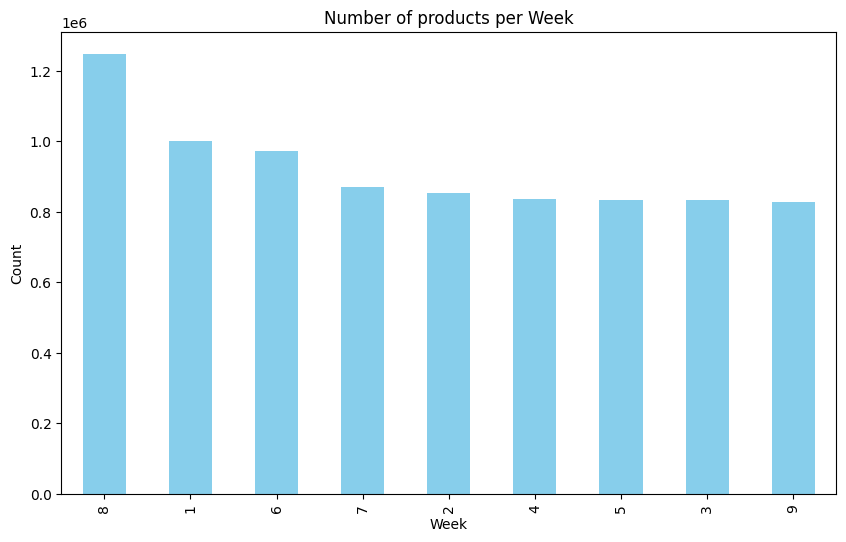

In [11]:
# Get the counts of unique values in the 'week' column
week_counts = combined_df['week'].value_counts()

# Plot a bar chart
week_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Number of products per Week')
plt.show()


Sessions with all zero prices: 0
Sessions with mixed prices: 65703


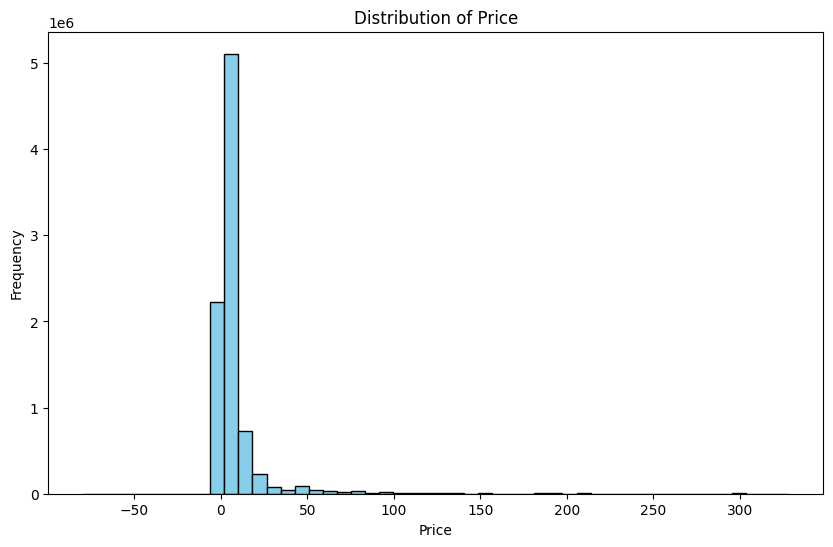

In [59]:
# Plot a histogram of the price feature
plt.figure(figsize=(10, 6))
plt.hist(combined_df['price'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()


In [26]:
negative_prices = combined_df[combined_df['price'] < 0]
zeros_prices = combined_df[combined_df['price']==0]
# Print the rows with negative prices
print("Rows with negative prices:",len(negative_prices))
print("Rows with zeros prices:",len(zeros_prices))


Rows with negative prices: 36
Rows with zeros prices: 17481


In [17]:
neg = combined_df[combined_df['product_id']==5716857]
neg

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,week
112860,2019-10-01 19:10:56+00:00,purchase,5716857,1487580014042939619,NaN,NaN,-23.81,552507528,dcdd60c6-1a70-442d-bfb2-0252879054ad,1
1783312,2019-10-13 16:46:01+00:00,purchase,5716857,1487580014042939619,NaN,NaN,-23.81,559820267,f178c995-f004-4040-b26d-b1cca0f9657d,2
2143762,2019-10-16 11:41:06+00:00,purchase,5716857,1487580014042939619,NaN,NaN,-23.81,461943726,beefa8fb-a3d1-48ca-97e9-9c95b05ee997,3
3608726,2019-10-28 07:41:54+00:00,purchase,5716857,1487580014042939619,NaN,NaN,-23.81,385939606,2255291d-8060-4ce9-934c-458a3bd0b944,4
3798007,2019-10-29 14:34:24+00:00,purchase,5716857,1487580014042939619,NaN,NaN,-23.81,554081558,4b84a8f9-97d7-4eb1-b120-7b34ddfe9a85,5
4510520,2019-11-04 11:54:29+00:00,purchase,5716857,1487580014042939619,NaN,NaN,-23.81,516725846,26e74f0c-762a-4162-b807-72a3e7bfa015,5
5474456,2019-11-10 20:16:38+00:00,purchase,5716857,1487580014042939619,NaN,NaN,-23.81,549736485,d1acbc83-3876-4317-a00f-6c60800f4572,6
6412556,2019-11-18 07:06:17+00:00,purchase,5716857,1487580014042939619,NaN,NaN,-23.81,565309368,47af9baa-94af-4334-a4ac-514230ddfa9c,7
7216495,2019-11-22 15:18:19+00:00,purchase,5716857,1487580014042939619,NaN,NaN,-23.81,541269785,3d92c5f7-5d6d-4df6-83ad-6fcdb4078761,8
8480291,2019-11-29 14:00:23+00:00,purchase,5716857,1487580014042939619,NaN,NaN,-23.81,480927132,e2a0c787-1f5b-4bd6-b449-9818addd688f,9


In [18]:
neg = combined_df[combined_df['product_id']==5716859]
neg

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,week
436918,2019-10-03 17:37:04+00:00,purchase,5716859,1487580014042939619,NaN,NaN,-47.62,555414763,479149eb-1807-4178-8f6b-87c642350735,1
1519246,2019-10-11 10:27:19+00:00,purchase,5716859,1487580014042939619,NaN,NaN,-47.62,543647038,85e11d74-6583-4eab-b50c-ff86dbb25d97,2
3135434,2019-10-24 08:10:06+00:00,purchase,5716859,1487580014042939619,NaN,NaN,-47.62,545859098,95ed1875-cb64-443d-90bb-17d0dc596c10,4
3502423,2019-10-27 11:24:32+00:00,purchase,5716859,1487580014042939619,NaN,NaN,-47.62,564627373,81d564e9-55b3-4929-9132-6353cab08a97,4
3807737,2019-10-29 16:07:23+00:00,purchase,5716859,1487580014042939619,NaN,NaN,-47.62,546120591,31cd4767-fadb-43ea-8a3f-f8769dd83fcf,5
4432906,2019-11-03 18:47:04+00:00,purchase,5716859,1487580014042939619,NaN,NaN,-47.62,567194545,fd27b149-3006-41cd-8afc-884c47272e5d,5
7012258,2019-11-21 19:34:16+00:00,purchase,5716859,1487580014042939619,NaN,NaN,-47.62,419166079,7e76a460-adb4-4e3f-9c85-c08a97016aa0,8
7196096,2019-11-22 13:46:53+00:00,purchase,5716859,1487580014042939619,NaN,NaN,-47.62,540003383,33da1676-00df-4f21-b87e-4c1b9b09420c,8
7408502,2019-11-23 13:30:53+00:00,purchase,5716859,1487580014042939619,NaN,NaN,-47.62,574878046,b60c5299-7a53-e636-6dc3-c7fd5d86452b,8


In [19]:
negative_prices

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,week
112860,2019-10-01 19:10:56+00:00,purchase,5716857,1487580014042939619,NaN,NaN,-23.81,552507528,dcdd60c6-1a70-442d-bfb2-0252879054ad,1
198302,2019-10-02 08:30:03+00:00,purchase,5716855,1487580014042939619,NaN,NaN,-7.94,550375225,5ddec778-9464-4514-914d-be7b751b8e2c,1
436918,2019-10-03 17:37:04+00:00,purchase,5716859,1487580014042939619,NaN,NaN,-47.62,555414763,479149eb-1807-4178-8f6b-87c642350735,1
443204,2019-10-03 18:25:39+00:00,purchase,5670257,1487580014042939619,NaN,NaN,-15.87,556383221,4333d203-bc4d-4d0d-a6e1-0ea3a97a28c1,1
1295556,2019-10-09 14:49:14+00:00,purchase,5716855,1487580014042939619,NaN,NaN,-7.94,514562574,fed2aeb4-0c75-44f7-9ca8-1a8be8214779,2
1426186,2019-10-10 14:33:29+00:00,purchase,5716855,1487580014042939619,NaN,NaN,-7.94,558797258,a406cf28-f04b-4361-8e6a-c62d36045e07,2
1519246,2019-10-11 10:27:19+00:00,purchase,5716859,1487580014042939619,NaN,NaN,-47.62,543647038,85e11d74-6583-4eab-b50c-ff86dbb25d97,2
1783312,2019-10-13 16:46:01+00:00,purchase,5716857,1487580014042939619,NaN,NaN,-23.81,559820267,f178c995-f004-4040-b26d-b1cca0f9657d,2
1924072,2019-10-14 17:33:24+00:00,purchase,5716861,1487580014042939619,NaN,NaN,-79.37,541122983,b60f777d-afca-4299-8548-273b810d6130,2
2143762,2019-10-16 11:41:06+00:00,purchase,5716857,1487580014042939619,NaN,NaN,-23.81,461943726,beefa8fb-a3d1-48ca-97e9-9c95b05ee997,3


In [20]:
# Extract product IDs with negative or zero prices
negative_price_product_ids = negative_prices['product_id'].unique()
zero_price_product_ids = zeros_prices['product_id'].unique()

# Filter combined DataFrame for positive price instances with the same product IDs
positive_prices_negative_ids = combined_df[(combined_df['price'] > 0) & combined_df['product_id'].isin(negative_price_product_ids)]
positive_prices_zero_ids = combined_df[(combined_df['price'] > 0) & combined_df['product_id'].isin(zero_price_product_ids)]

# Display the positive price instances for products with negative or zero prices
print(len(positive_prices_zero_ids))
print(len(positive_prices_negative_ids))

336107
0


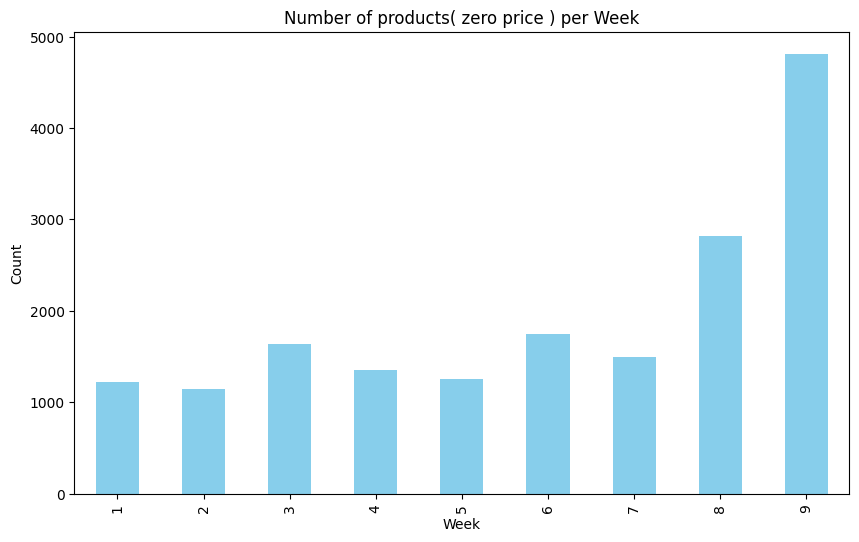

In [27]:
positive_prices_zero_idsCount=zeros_prices['week'].value_counts().sort_index()
# Plot a bar chart
positive_prices_zero_idsCount.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Number of products( zero price ) per Week')
plt.show()

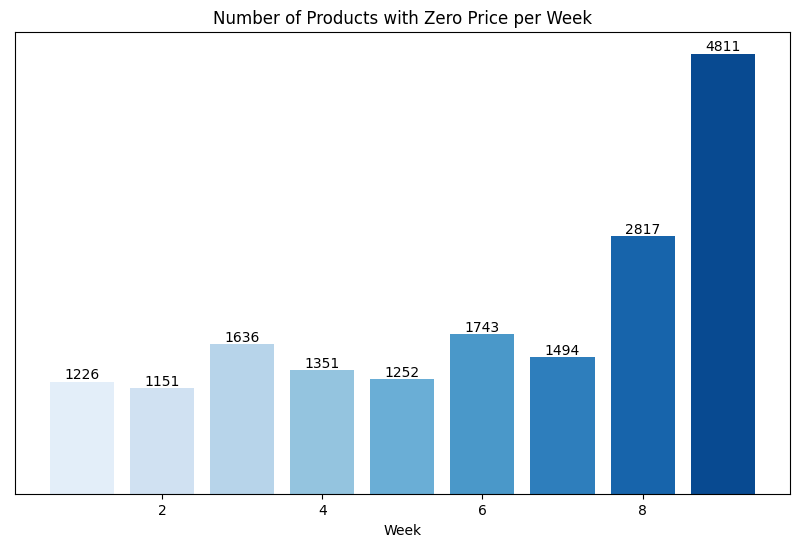

In [28]:
import seaborn as sns

# Use a professional color palette
colors = sns.color_palette("Blues", len(positive_prices_zero_idsCount))

# Plot a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(positive_prices_zero_idsCount.index, positive_prices_zero_idsCount, color=colors)

# Add numbers above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

# Remove y-axis
plt.gca().axes.get_yaxis().set_visible(False)

# Set labels and title
plt.xlabel('Week')
plt.title('Number of Products with Zero Price per Week')

plt.show()


In [13]:
# Filter the dataset to include only purchases
purchase_df = combined_df[combined_df['event_type'] == 'purchase']

# Group the data by session_id
grouped_by_session = purchase_df.groupby('user_session')

# Initialize lists to store sessions where all products have zero prices
sessions_with_all_zero_prices = []
sessions_with_mixed_prices = []

# Iterate over each session
for session_id, session_data in grouped_by_session:
    # Check if all products in the session have zero prices
    if (session_data['price'] == 0).all():
        sessions_with_all_zero_prices.append(session_id)
    else:
        sessions_with_mixed_prices.append(session_id)

# Print the number of sessions with all zero prices and with mixed prices
print("Sessions with all zero prices:", len(sessions_with_all_zero_prices))
print("Sessions with mixed prices:", len(sessions_with_mixed_prices))

Sessions with all zero prices: 0
Sessions with mixed prices: 65703


<div style="background-color: #4F81BD; padding: 20px; font-family: 'Arial', sans-serif; font-size: 16px;">
    <h2 style="color: white; text-align: center;">I think it's zero because there may be discounts or orders where a specific product is purchased and another is given for free </h2>

In [63]:
# Drop rows with negative prices
combined_df = combined_df.drop(combined_df[combined_df['price'] < 0].index)

# Check if negative price rows are dropped
print("Rows with negative prices have been dropped.")

Rows with negative prices have been dropped.


In [64]:
combined_df.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session', 'week'],
      dtype='object')

<div style="background-color: #4F81BD; padding: 20px; font-family: 'Arial', sans-serif; font-size: 16px;">
    <h2 style="color: white; text-align: center;"> Are there any price trends for a particular product over time? </h2>

<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">   
    <p style="color: white;"> See Sum Prices Over All Weeks We have   </p>
</div>

In [40]:
weekly_stats = combined_df.groupby(['week','event_type']).agg({'product_id': 'count', 'price': 'sum'}).reset_index()
weekly_stats.head(5)

,week,event_type,product_id,price
0,1,cart,367551,2208926.21
1,1,purchase,56542,277591.95
2,1,remove_from_cart,130899,694630.81
3,1,view,446523,5387567.47
4,2,cart,250133,1309611.56


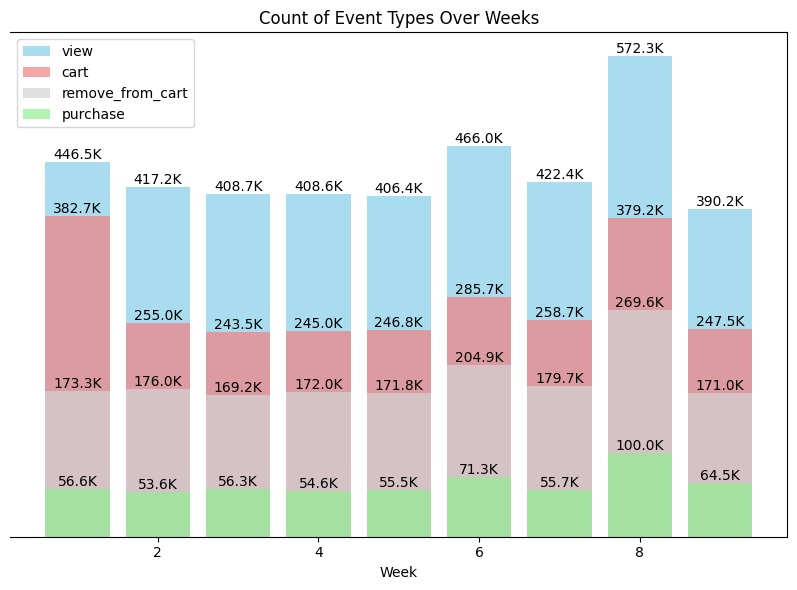

In [67]:
import matplotlib.pyplot as plt

# Define colors for each event type
colors = {'view': 'skyblue', 'cart': 'lightcoral', 'remove_from_cart': 'lightgrey', 'purchase': 'lightgreen'}
plt.figure(figsize=(16, 6))  # Wider figure

# Grouped bar plot for count of event types
plt.subplot(1, 2, 1)
for event_type in colors.keys():
    event_type_data = weekly_stats[weekly_stats['event_type'] == event_type]
    bars = plt.bar(event_type_data['week'], event_type_data['product_id'], label=event_type, color=colors[event_type], alpha=0.7)
    # Add text inside each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{height / 1e6:.1f}M' if height >= 1e6 else f'{height / 1e3:.1f}K', ha='center', va='bottom')

# Remove y-axis
plt.gca().spines['left'].set_visible(False)
plt.gca().yaxis.set_visible(False)

# Remove gridlines
plt.grid(False)

plt.xlabel('Week')
plt.ylabel('Count of Events')
plt.title('Count of Event Types Over Weeks')
plt.legend()

plt.tight_layout()
plt.show()


In [42]:
# Iterate over each week
for week in range(1, 10):
    print(f"Week {week}:")
    
    # Iterate over each event type
    for event_type in colors.keys():
        event_type_data = weekly_stats[(weekly_stats['event_type'] == event_type) & (weekly_stats['week'] == week)]
        
        # Check if there is data for the current event type and week
        if not event_type_data.empty:
            count = event_type_data['product_id'].values[0]
            print(f"    {event_type}: {count}")
        else:
            print(f"    {event_type}: 0")


Week 1:
    view: 446523
    cart: 367551
    remove_from_cart: 130899
    purchase: 56542
Week 2:
    view: 417158
    cart: 250133
    remove_from_cart: 133113
    purchase: 53543
Week 3:
    view: 408629
    cart: 240029
    remove_from_cart: 128556
    purchase: 56241
Week 4:
    view: 408599
    cart: 241768
    remove_from_cart: 130210
    purchase: 54545
Week 5:
    view: 406402
    cart: 243368
    remove_from_cart: 129782
    purchase: 55411
Week 6:
    view: 465976
    cart: 280936
    remove_from_cart: 154116
    purchase: 71246
Week 7:
    view: 422313
    cart: 254753
    remove_from_cart: 138271
    purchase: 55636
Week 8:
    view: 572252
    cart: 372552
    remove_from_cart: 203504
    purchase: 99928
Week 9:
    view: 390191
    cart: 242760
    remove_from_cart: 130378
    purchase: 64458


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


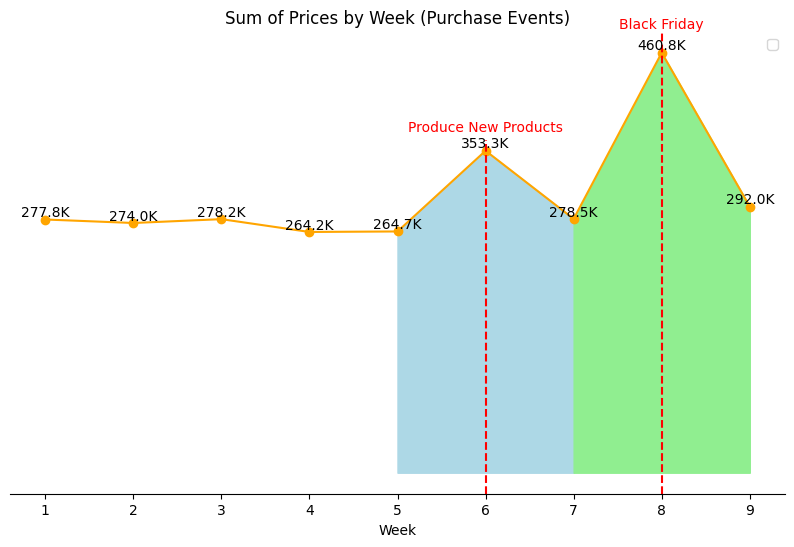

In [68]:
# Filter data for purchase event type
purchase_stats = weekly_stats[weekly_stats['event_type'] == 'purchase']

plt.figure(figsize=(10, 6))

# Plot the sum of prices for weeks before week 8 (colored orange)
plt.plot(purchase_stats['week'][:9], purchase_stats['price'][:9], marker='o', color='orange')

# Add colored lines between week 5 and 7 (light blue)
plt.fill_between(purchase_stats['week'][4:7], 0, purchase_stats['price'][4:7], color='lightblue')

# Add colored lines between week 7 and 8 (green)
plt.fill_between(purchase_stats['week'][6:8], 0, purchase_stats['price'][6:8], color='lightgreen')

# Add colored lines between week 8 and 9 (light yellow)
plt.fill_between(purchase_stats['week'][7:], 0, purchase_stats['price'][7:], color='lightgreen')

plt.title('Sum of Prices by Week (Purchase Events)')
plt.xlabel('Week')
plt.xticks(purchase_stats['week'])  # Ensure all weeks are labeled
plt.gca().spines['top'].set_visible(False)  # Remove top spine
plt.gca().spines['right'].set_visible(False)  # Remove right spine
plt.gca().spines['left'].set_visible(False)  # Remove left spine
plt.yticks([])  # Remove y-axis

# Add values on top of points
for x, y in zip(purchase_stats['week'], purchase_stats['price']):
    if y >= 1e6:
        yval_str = f'{y/1e6:.1f}M'
    elif y >= 1e3:
        yval_str = f'{y/1e3:.1f}K'
    else:
        yval_str = f'{y}'
    plt.text(x, y, yval_str, ha='center', va='bottom')

# Add vertical line for Black Friday at week 8
plt.axvline(x=8, color='red', linestyle='--')
plt.text(8, max(purchase_stats['price']) * 1.05, 'Black Friday', ha='center', va='bottom', color='red')

# Add vertical line for Product 1601 New Product at week 6
week_6_price = purchase_stats[purchase_stats['week'] == 6]['price'].values[0]
plt.axvline(x=6, ymin=0, ymax=week_6_price / max(purchase_stats['price']), color='red', linestyle='--')
plt.text(6, week_6_price * 1.05, 'Produce New Products', ha='center', va='bottom', color='red')

# Remove y-axis and grid lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.grid(False)

plt.legend()
plt.show()


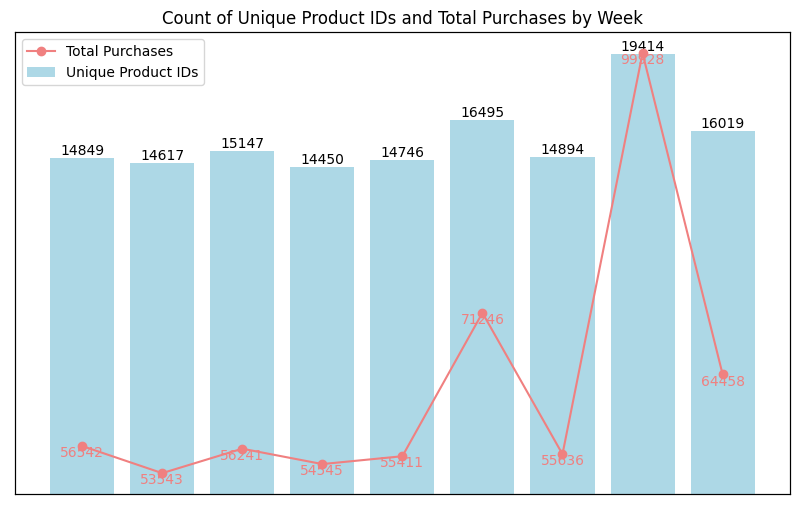

In [31]:
import matplotlib.pyplot as plt

# Initialize dictionaries to store the counts of unique product IDs and the sum of prices for each week
unique_product_counts = {}
total_prices = {}

# Filter the DataFrame to include only purchase events
purchase_df = combined_df[combined_df['event_type'] == 'purchase']

# Loop through each week from 1 to 9
for week in range(1, 10):
    # Filter the purchase DataFrame for the current week
    week_df = purchase_df[purchase_df['week'] == week]
    
    # Count the number of unique product IDs for the current week
    num_unique_products = week_df['product_id'].nunique()
    
    # Calculate the total number of purchases for the current week
    total_purchases = len(week_df)
    
    # Store the count of unique product IDs and the total number of purchases in the dictionaries with the week as the key
    unique_product_counts[f"Week {week}"] = num_unique_products
    total_prices[f"Week {week}"] = total_purchases

# Convert dictionaries to lists for plotting
weeks = list(unique_product_counts.keys())
unique_counts = list(unique_product_counts.values())
purchase_counts = list(total_prices.values())

# Create a bar chart for the count of unique product IDs and total purchases
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for counts of unique product IDs
bar1 = ax1.bar(weeks, unique_counts, color='lightblue', label='Unique Product IDs')
ax1.set_ylabel('Unique Product IDs Count', color='blue')
ax1.tick_params('y', colors='blue')

# Add counts above each bar with light blue color
for bar, count in zip(bar1, unique_counts):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1, count, ha='center', va='bottom', color='black')

# Create a secondary y-axis for the total number of purchases
ax2 = ax1.twinx()
line1, = ax2.plot(weeks, purchase_counts, color='lightcoral', marker='o', label='Total Purchases')
ax2.set_ylabel('Total Purchases Count', color='red')
ax2.tick_params('y', colors='red')

# Add counts under each point with light blue color
for week, count in zip(weeks, purchase_counts):
    ax2.text(week, count, count, ha='center', va='top', color='lightcoral')

# Remove x-axis and y-axis
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax2.yaxis.set_visible(False)

# Add legend
plt.legend([line1, bar1], ['Total Purchases', 'Unique Product IDs'], loc='upper left')

# Title
plt.title('Count of Unique Product IDs and Total Purchases by Week')

plt.show()


In [43]:
# Step 1: Filter the dataset for purchased events
purchased_df = combined_df[combined_df['event_type'] == 'purchase']

# Step 2: Filter the dataset for week 6
week_6_df = purchased_df[purchased_df['week'] == 5]

# Step 3: Filter the dataset for weeks before week 6
weeks_before_6_df = purchased_df[purchased_df['week']  == 6]

# Step 4: Find unique product IDs in week 6
unique_products_week_6 = set(week_6_df['product_id'])

# Step 5: Find unique product IDs in weeks before week 6
unique_products_before_week_6 = set(weeks_before_6_df['product_id'])

# Step 6: Find unique product IDs that exist in week 6 but not before week 6
products_only_in_week_6 =   unique_products_before_week_6 - unique_products_week_6

# Step 7: Get the count of unique products only in week 6
count_products_only_in_week_6 = len(products_only_in_week_6)

print(f"Number of products existing only in week 6 and not before week 6: {count_products_only_in_week_6}")


Number of products existing only in week 6 and not before week 6: 6339


In [13]:
combined_df.sample(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,week
5739386,2019-11-12 19:46:36+00:00,view,5884355,1487580010561667147,NaN,oniq,10.32,477446541,62bba7b5-01c5-4405-8670-c5db3bb80bcf,7
281419,2019-10-02 16:26:22+00:00,cart,5772465,1602943681873052386,NaN,grattol,4.76,544966001,c0449c2e-3ab0-45e5-ba80-0bcad399bb1e,1
5994343,2019-11-14 17:47:33+00:00,view,5891286,1487580013069861041,NaN,NaN,23.02,566765106,1b729fc8-e0b3-4a25-acd1-df01cebccb0b,7
3756324,2019-10-29 09:24:12+00:00,purchase,84902,1487580013069861041,NaN,depilflax,21.43,565343260,58b60106-8fe4-43e9-a488-616cc5ec9147,5
4684806,2019-11-05 14:31:02+00:00,view,5738967,1487580008187692007,NaN,roubloff,34.13,376251693,6a9d25ac-c930-42c2-bcd8-e7dfd3956818,6
5441779,2019-11-10 16:15:56+00:00,remove_from_cart,5561004,1487580005595612013,NaN,NaN,3.00,558093005,49f507b4-bf25-4fbc-b9b3-a4639a141a0d,6
4101109,2019-10-31 23:08:49+00:00,purchase,5888519,1487580012432326804,NaN,laboratorium,5.56,566272734,573d9260-4f53-414b-9b96-7f2d135cbc64,5
1973318,2019-10-15 06:04:22+00:00,view,5866553,1487580011283087468,NaN,NaN,12.70,473686079,bf61173b-fb2e-4c74-ab8e-7ac991036fb3,3
4201217,2019-11-01 19:30:09+00:00,purchase,5685400,2089259162625114209,NaN,ardell,6.90,519688813,cd0a3814-2053-444f-9717-8e4a88bcc452,5
5704563,2019-11-12 15:10:17+00:00,remove_from_cart,5754853,1487580005092295511,NaN,NaN,10.63,564789422,d3814041-9d83-415a-ad9c-c600f04d2e34,7


In [21]:
weekly_stats = combined_df.groupby(['week']).agg({'product_id': 'count', 'price': 'sum'}).reset_index()
weekly_stats.head()

,week,product_id,price
0,1,1001515,8568716.44
1,2,853947,7471601.59
2,3,833455,7520938.94
3,4,835122,7241529.07
4,5,834963,7169215.80


<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">   
    <p style="color: white;"> Pick top 10 Product ID from Data to try to answer Q Are there any price trends for a particular product over time?   </p>
</div>

In [19]:
# Filter the DataFrame to include only purchases
purchases_df = combined_df[combined_df['event_type'] == 'purchase']

# Group by product_id and get the sum of prices for each group
product_purchase_sum = purchases_df.groupby('product_id')['price'].sum()

# Get the top 10 products with the highest sum of prices
top_10_purchase_products = product_purchase_sum.nlargest(10)

# Reset index to make it a DataFrame
top_10_purchase_products_df = top_10_purchase_products.reset_index()


top_10_purchase_products_df

,product_id,price
0,5560754,31672.08
1,5877454,18727.02
2,5751422,16953.96
3,5751383,13909.71
4,5560756,13636.68
5,89343,13356.45
6,5792800,13285.40
7,5856186,13219.73
8,5809910,12540.87
9,5849033,12100.86


<div style="background-color: #4F81BD; padding: 10px; font-family: 'Arial', sans-serif;">   
    <p style="color: white;"> Plot Line Graph To See Changing over Weeks For Top 10 Product(prices) </p>
</div> 

In [23]:
# Filter the DataFrame to include only purchases
purchases_df = combined_df[combined_df['event_type'] == 'purchase']

# Group by product_id and get the sum of prices for each group
product_purchase_sum = purchases_df.groupby('product_id')['price'].mean()

# Get the top 10 products with the highest sum of prices
top_10_purchase_products = product_purchase_sum.nlargest(10)

In [24]:
top_10_purchase_products

product_id
5906221    311.380000
89343      296.810000
5873656    271.070000
5873654    269.607500
5906220    259.370000
5898229    236.510000
5898228    208.916667
5560756    206.616364
5560760    196.886667
5590822    194.440000
Name: price, dtype: float64

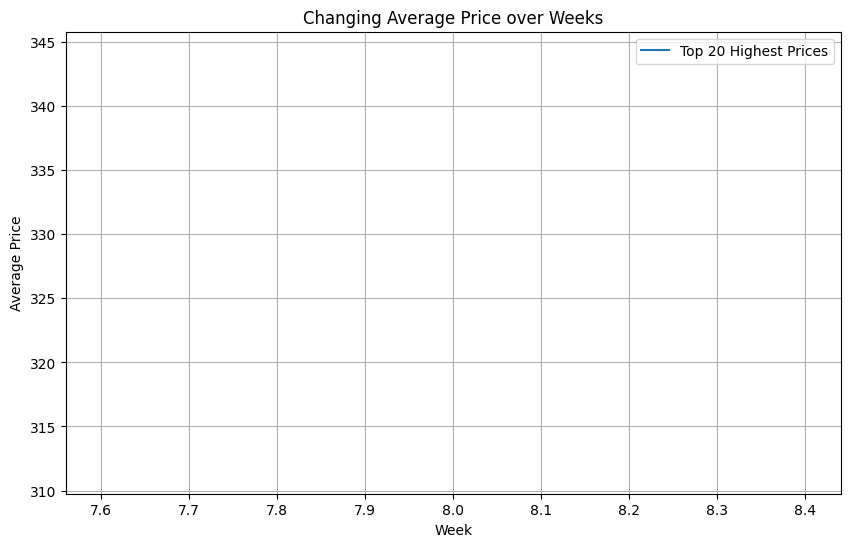

In [122]:
# Identify the top 20 highest prices
top_20_highest_prices = combined_df.nlargest(20, 'price')

# Identify the top 20 prices with prices more than 0
top_20_positive_prices = combined_df[combined_df['price'] > 0].nlargest(20, 'price')

# Group by week and calculate the average price for each group
avg_price_top_20_highest = top_20_highest_prices.groupby('week')['price'].mean()
avg_price_top_20_positive = top_20_positive_prices.groupby('week')['price'].mean()

# Plot the changing average price over weeks for each group
plt.figure(figsize=(10, 6))
plt.plot(avg_price_top_20_highest.index, avg_price_top_20_highest.values, label='Top 20 Highest Prices')
plt.xlabel('Week')
plt.ylabel('Average Price')
plt.title('Changing Average Price over Weeks')
plt.legend()
plt.grid(True)
plt.show()


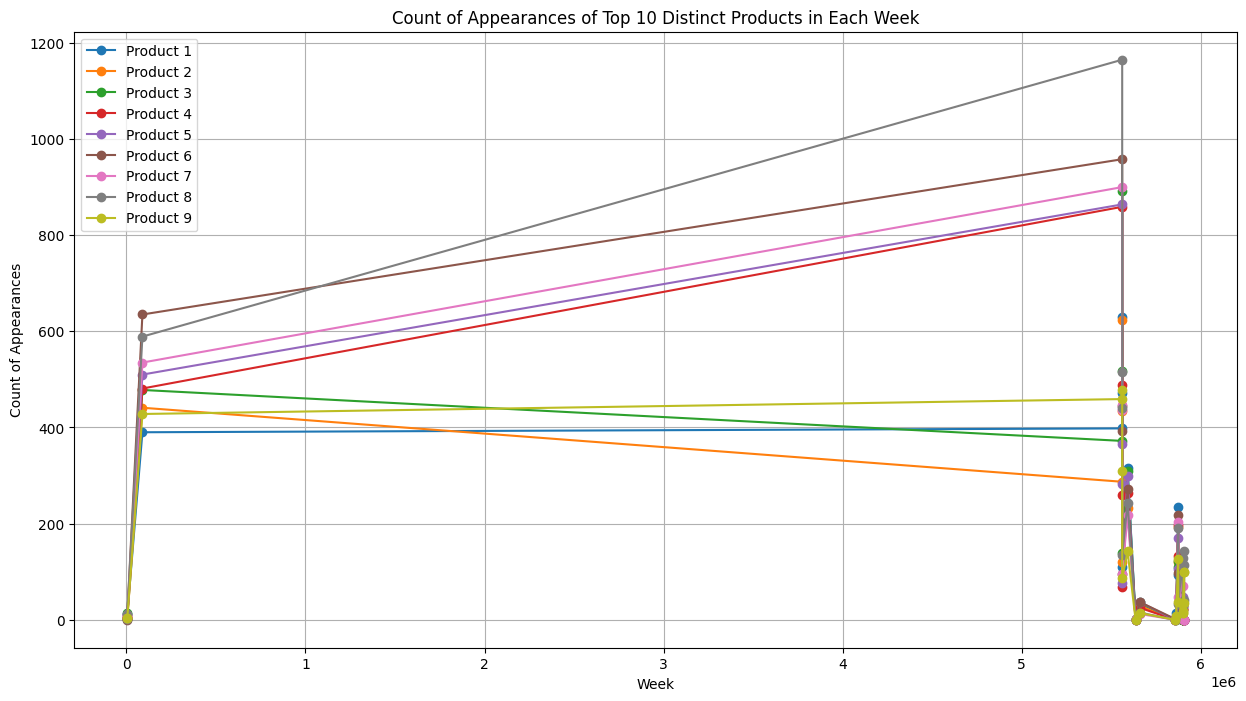

In [137]:
import matplotlib.pyplot as plt

# Find the top 10 distinct products based on their average price
top_10_products = combined_df.groupby('product_id')['price'].mean().nlargest(20)

# Filter the dataset for rows corresponding to the top 10 products
top_10_products_df = combined_df[combined_df['product_id'].isin(top_10_products.index)]

# Group the filtered dataset by product and week and count the appearances for each product in each week
count_appearances_top_10_products = top_10_products_df.groupby(['product_id', 'week']).size().unstack(fill_value=0)

# Plot the changing average price over weeks for each product
plt.figure(figsize=(15, 8))

# Plot the count of appearances for each product in each week
for product_id, count_appearances_weekly in count_appearances_top_10_products.items():
    plt.plot(count_appearances_weekly.index, count_appearances_weekly.values, marker='o', label=f'Product {product_id}')

plt.xlabel('Week')
plt.ylabel('Count of Appearances')
plt.title('Count of Appearances of Top 10 Distinct Products in Each Week')
plt.legend()
plt.grid(True)
plt.show()


In [138]:
count_appearances_top_10_products

week,1,2,3,4,5,6,7,8,9
product_id,,,,,,,,,
4623,4,3,2,3,1,0,7,2,3
4851,11,1,15,6,4,9,9,12,3
89343,390,441,478,481,510,635,535,589,428
5560754,398,287,372,859,864,958,900,1165,459
5560756,629,623,892,489,365,445,446,516,478
5560758,472,434,518,259,283,393,437,440,309
5560760,109,121,138,68,76,95,96,135,86
5590822,315,232,309,264,300,271,217,243,142
5635474,1,2,2,0,0,0,1,0,0


In [134]:
avg_price_top_10_products

week,1,2,3,4,5,6,7,8,9
product_id,,,,,,,,,
4623,217.46,217.46,217.46,217.460000,217.46,NaN,217.46,217.460000,217.460000
4851,252.38,252.38,252.38,252.380000,252.38,252.38,252.38,252.380000,252.380000
89343,299.81,299.81,299.81,299.810000,299.81,299.81,299.81,295.103718,295.078692
5560754,194.44,194.44,194.44,194.440000,194.44,194.44,194.44,190.986129,194.440000
5560756,207.94,207.94,207.94,207.940000,207.94,207.94,207.94,204.009767,203.449289
5560758,187.30,187.30,187.30,187.300000,187.30,187.30,187.30,182.300909,181.241748
5560760,201.59,201.59,201.59,201.590000,201.59,201.59,201.59,192.705926,190.597326
5590822,194.44,194.44,194.44,194.440000,194.44,194.44,194.44,189.514938,188.204577
5635474,307.60,307.60,307.60,NaN,NaN,NaN,307.60,NaN,NaN


In [127]:
max_price

327.78

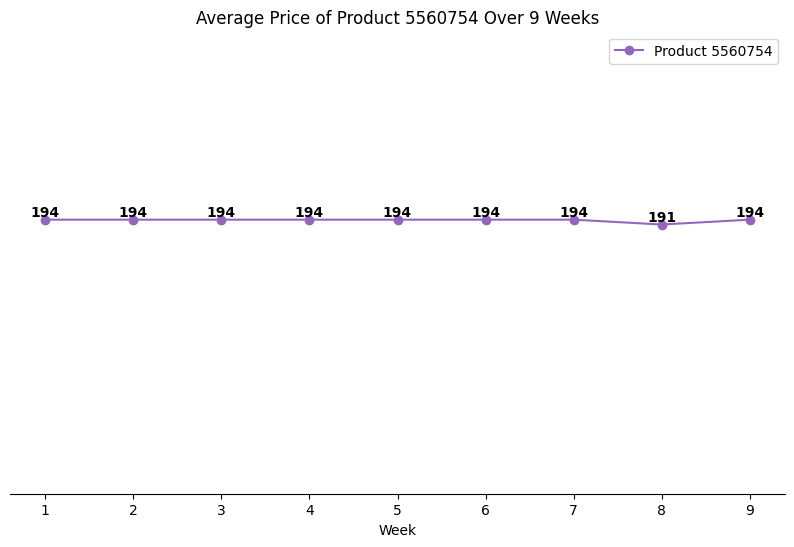

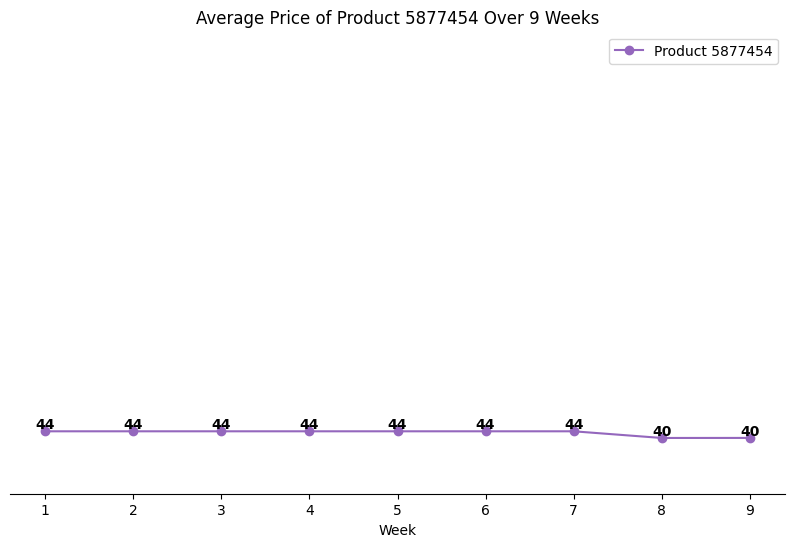

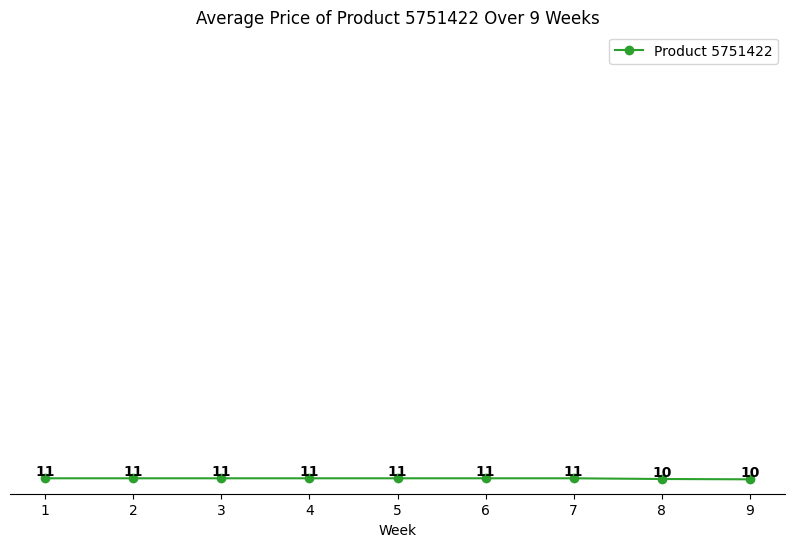

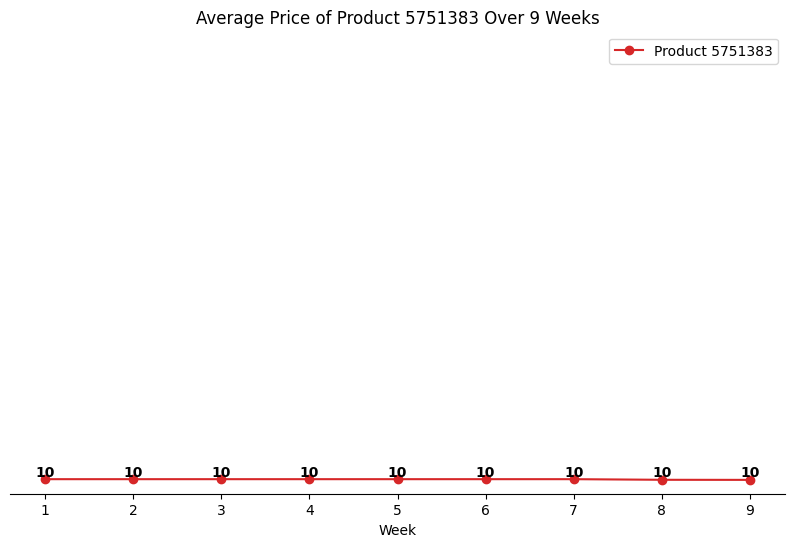

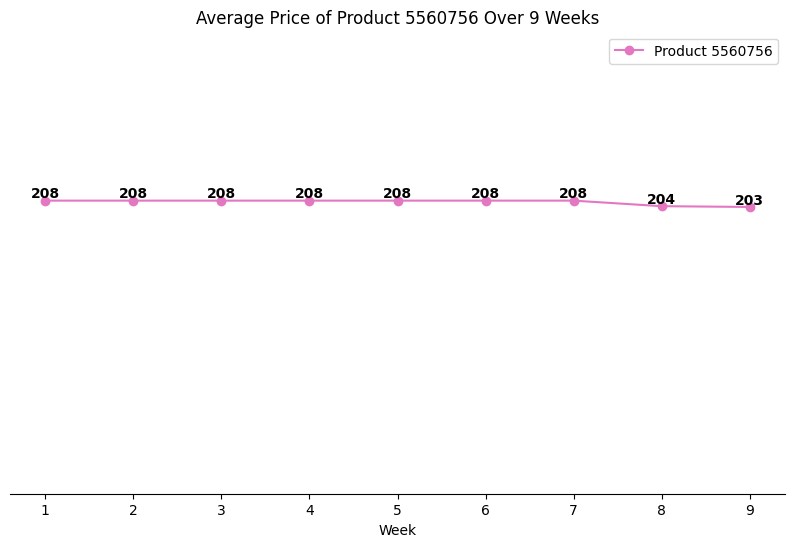

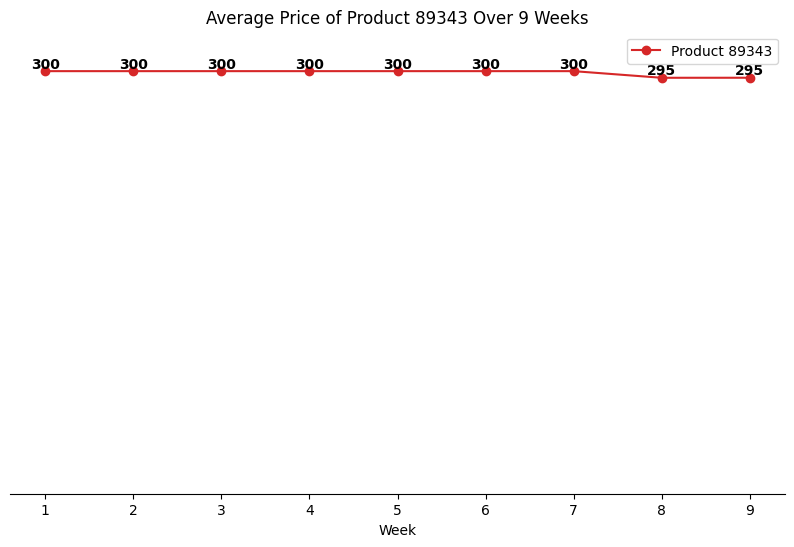

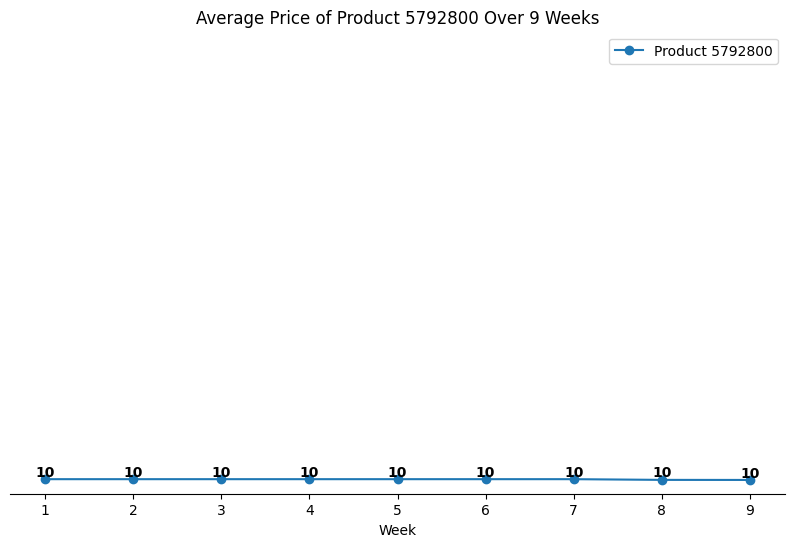

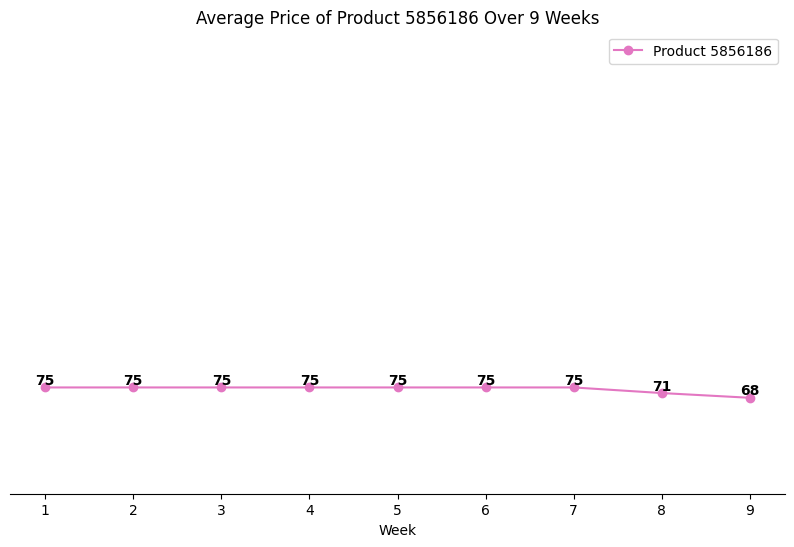

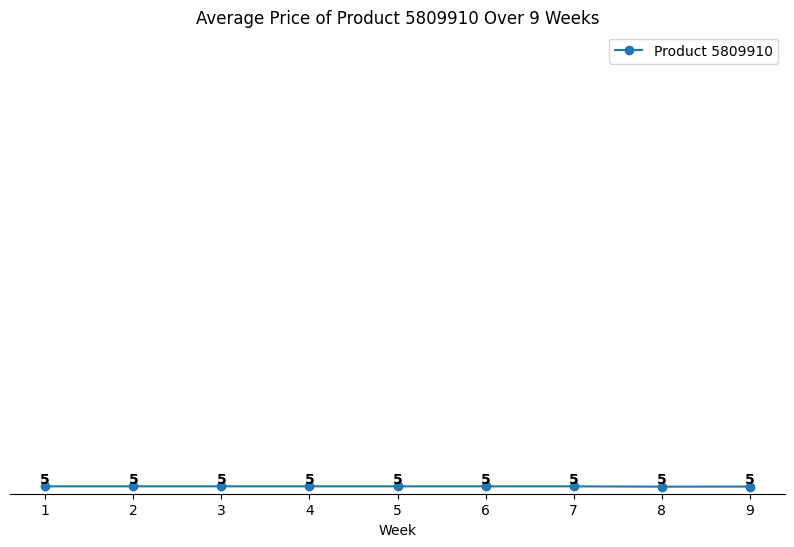

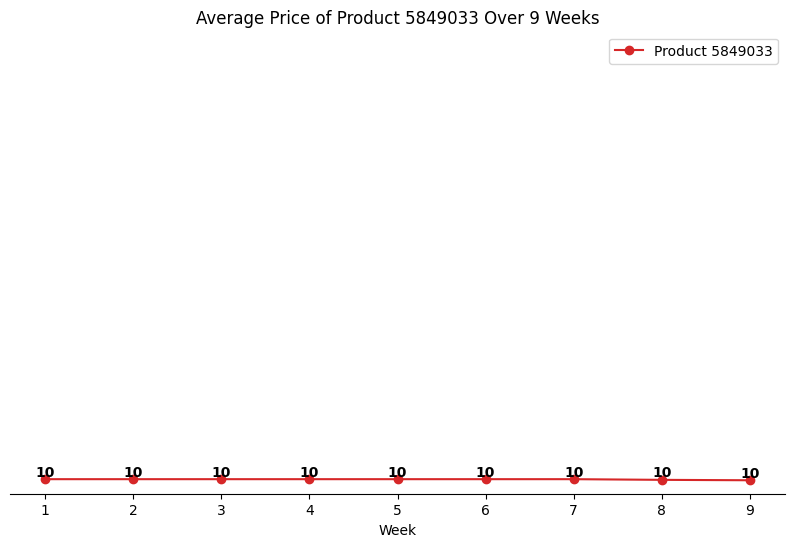

In [25]:
# Filter the DataFrame to include only purchases
purchases_df = combined_df[combined_df['event_type'] == 'purchase']

# Group by product_id and get the sum of prices for each group
product_purchase_sum = purchases_df.groupby('product_id')['price'].sum()

# Get the top 10 products with the highest sum of prices
top_10_purchase_products = product_purchase_sum.nlargest(10)

# Reset index to make it a DataFrame
top_10_purchase_products_df = top_10_purchase_products.reset_index()

# Iterate over each product
for product_id in top_10_purchase_products_df['product_id']:
    # Filter the data for the current product
    product_data = combined_df[combined_df['product_id'] == product_id]
    
    # Group by week and calculate the mean of prices for each week
    weekly_mean = product_data.groupby(['week']).agg({'price':'mean'}).reset_index()
    
    # Plot the prices over the 9 weeks for the current product
    plt.figure(figsize=(10, 6))
    plt.plot(weekly_mean['week'], weekly_mean['price'], marker='o', label=f'Product {product_id}', color=plt.cm.tab10(product_id % 10))
    
    # Add labels and title
    plt.xlabel('Week')
    plt.title(f'Average Price of Product {product_id} Over 9 Weeks')
    plt.legend()
    
    # Set a fixed range for the y-axis
    plt.ylim(0, combined_df['price'].max())  # Adjust the maximum value if needed
    
    # Add price values on top of each point
    
    # Add price values on top of each point
    for x, y in zip(weekly_mean['week'], weekly_mean['price']):
        # Convert price to K or M based on magnitude
        if y >= 1e6:
            value_label = f'{y / 1e6:.1f}M'
        elif y >= 1e3:
            value_label = f'{y / 1e3:.1f}K'
        else:
            value_label = f'{y:.0f}'
        plt.text(x, y, value_label, ha='center', va='bottom', weight='bold')

    # Remove y-axis and grid lines
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.grid(False)
    plt.yticks([])  # Remove y-axis ticks
    plt.show()


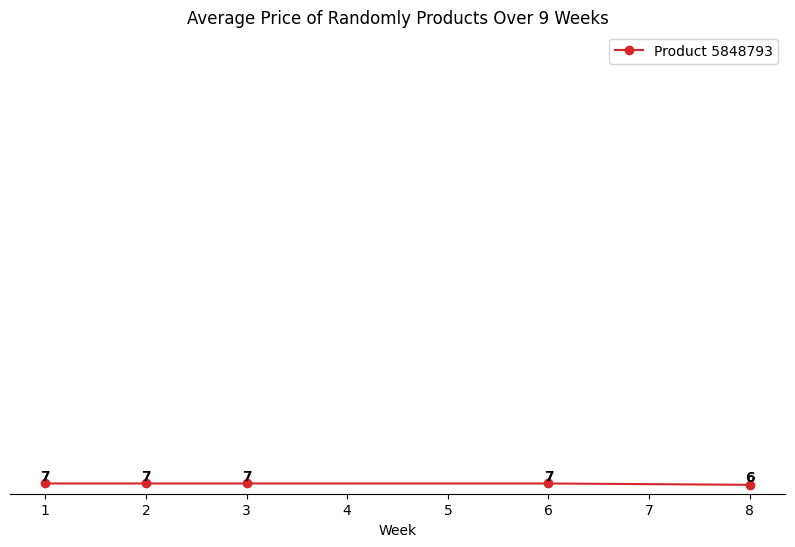

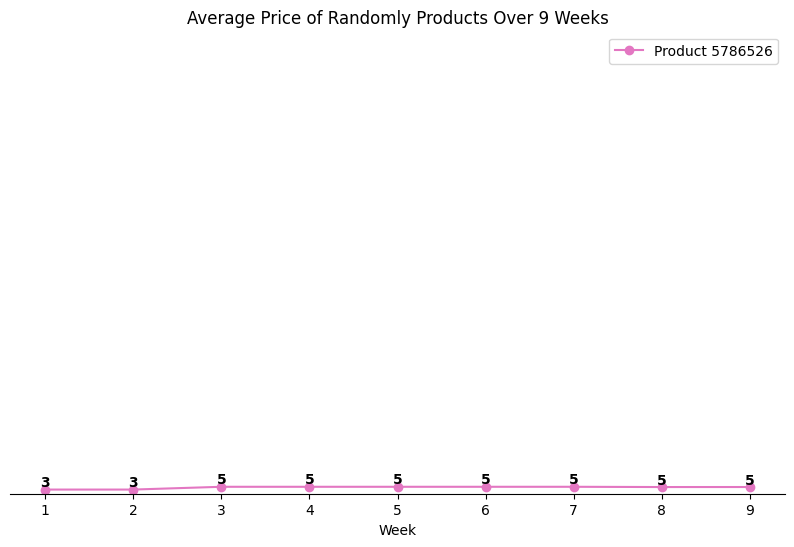

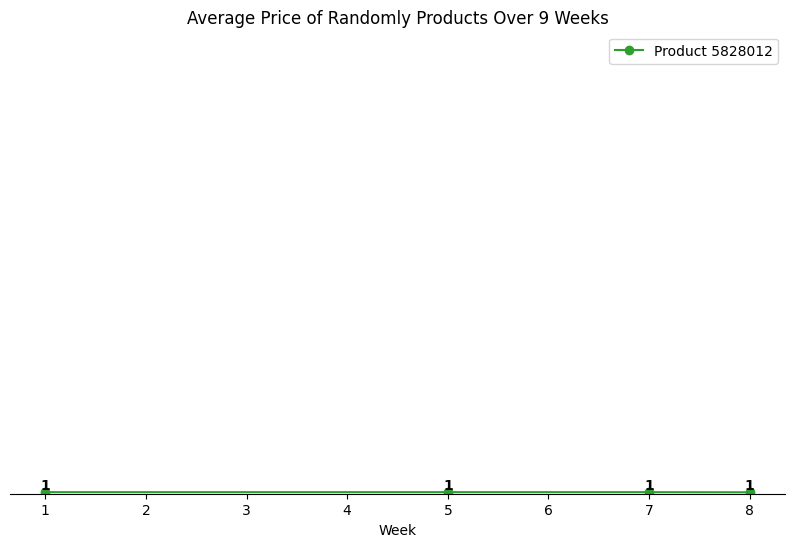

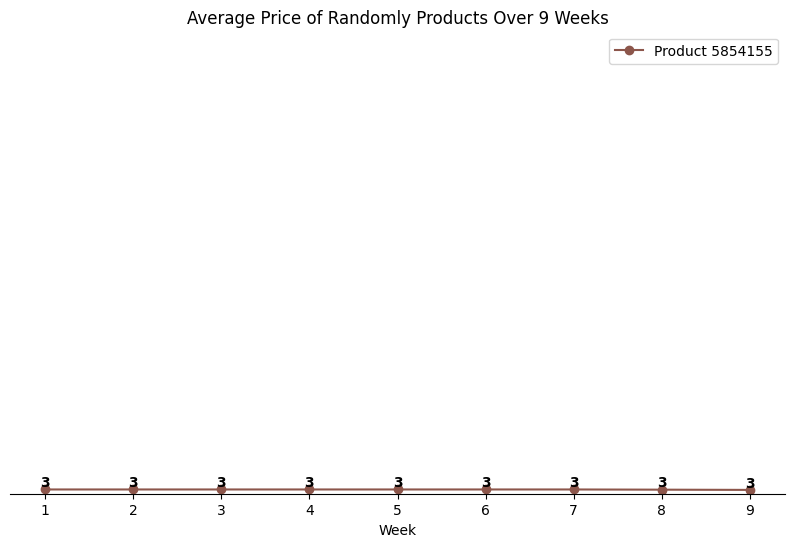

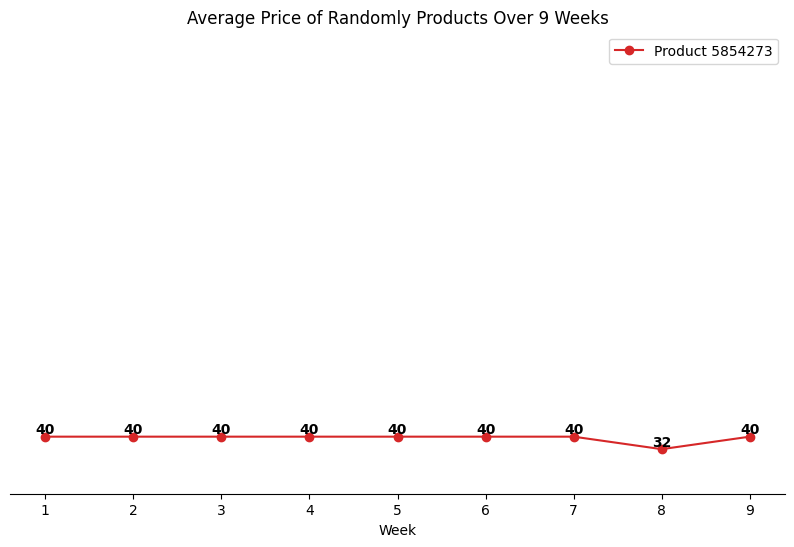

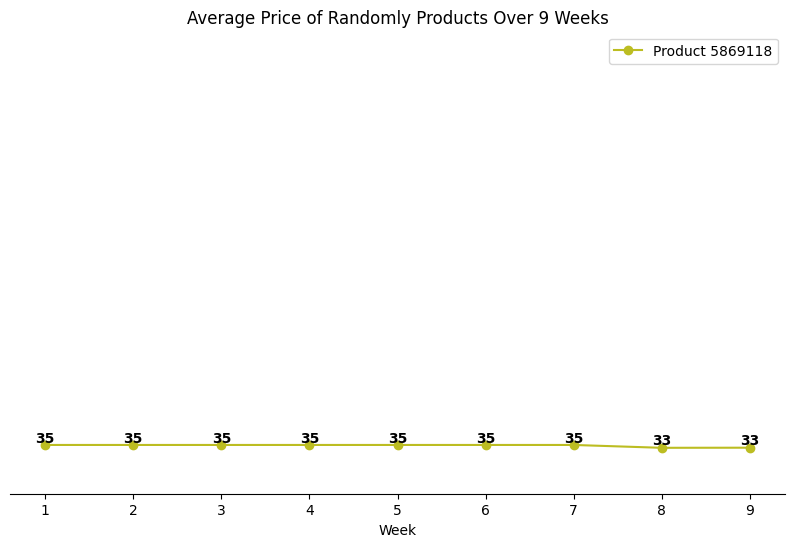

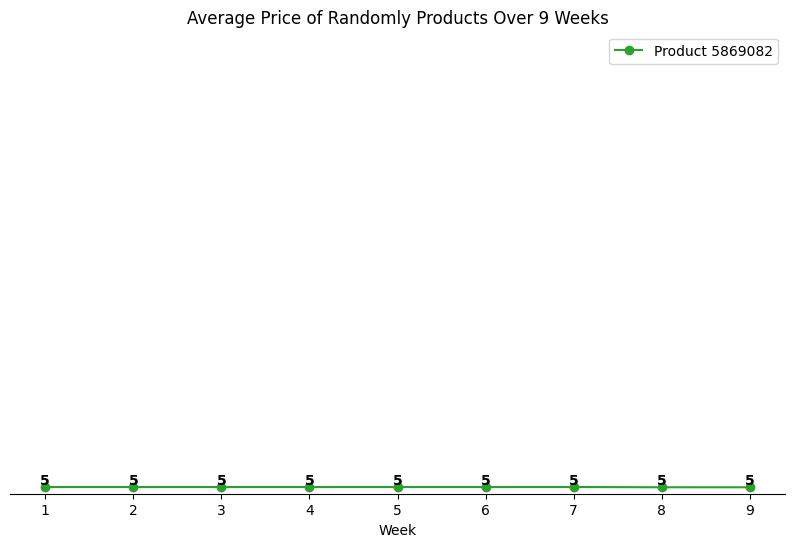

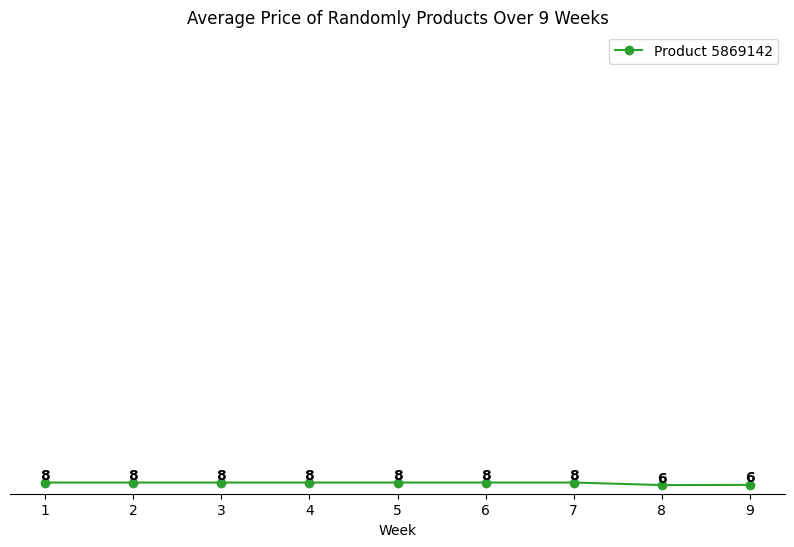

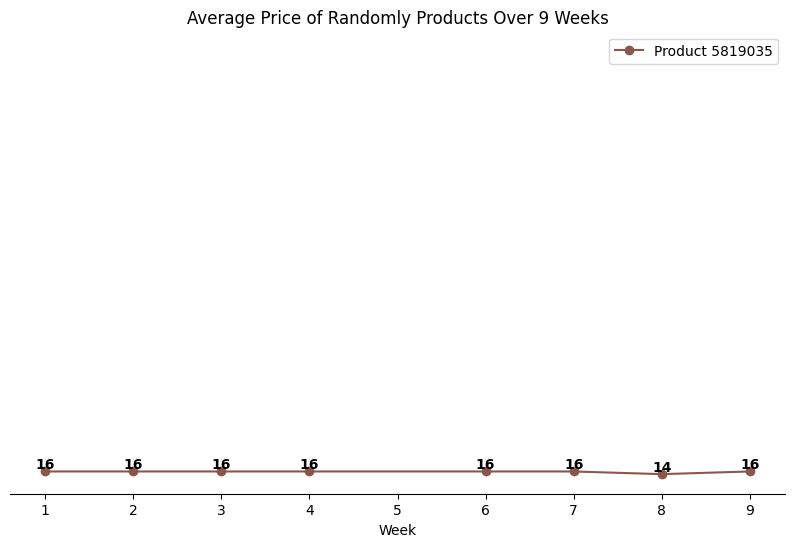

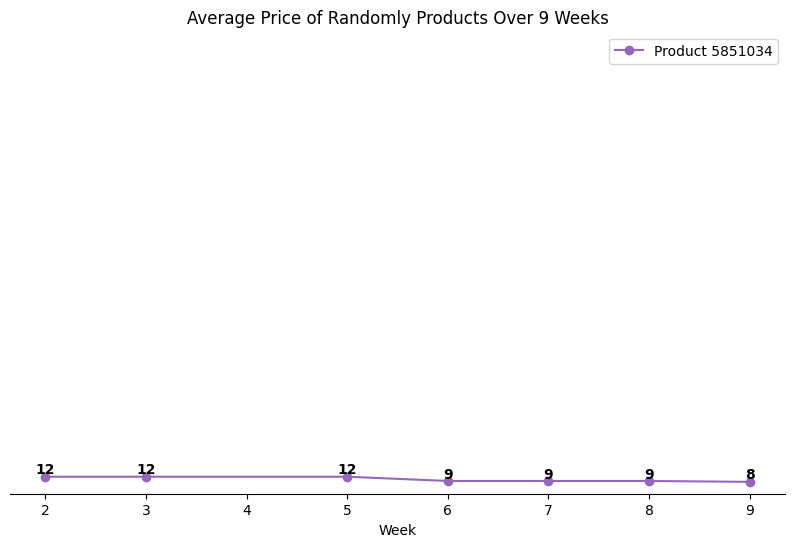

In [31]:
import random

# Sample 10 random product IDs from the DataFrame
random_product_ids = random.sample(combined_df['product_id'].unique().tolist(), 10)

# Iterate over each randomly selected product
for product_id in random_product_ids:
    # Filter the data for the current product
    product_data = combined_df[combined_df['product_id'] == product_id]
    
    # Group by week and calculate the mean of prices for each week
    weekly_mean = product_data.groupby(['week']).agg({'price':'mean'}).reset_index()
    
    # Plot the prices over the 9 weeks for the current product
    plt.figure(figsize=(10, 6))
    plt.plot(weekly_mean['week'], weekly_mean['price'], marker='o', label=f'Product {product_id}', color=plt.cm.tab10(product_id % 10))
    
    # Add labels and title
    plt.xlabel('Week')
    plt.title(f'Average Price of Randomly Products Over 9 Weeks')
    plt.legend()
    
    # Set a fixed range for the y-axis
    plt.ylim(0, combined_df['price'].max())  # Adjust the maximum value if needed
    
    # Add price values on top of each point
    for x, y in zip(weekly_mean['week'], weekly_mean['price']):
        # Convert price to K or M based on magnitude
        if y >= 1e6:
            value_label = f'{y / 1e6:.1f}M'
        elif y >= 1e3:
            value_label = f'{y / 1e3:.1f}K'
        else:
            value_label = f'{y:.0f}'
        plt.text(x, y, value_label, ha='center', va='bottom', weight='bold')

    # Remove y-axis and grid lines
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.grid(False)
    plt.yticks([])  # Remove y-axis ticks
    plt.show()


<div style="background-color: #4F81BD; padding: 20px; font-family: 'Arial', sans-serif; font-size: 16px;">
    <h2 style="color: white; text-align: center;">Summary of Findings</h2>
    <hr style="border: 1px solid white;">
    <div style="background-color: #4F81BD; padding: 20px; font-family: 'Arial', sans-serif; font-size: 16px;">
    <h2 style="color: white; text-align: center;">Conclusion</h2>
<p style="color: white;">Based on the analysis conducted, it was observed that the average price of randomly selected products decreased during weeks 8 and 9, which coincided with Black Friday. This decline in average price during these weeks suggests that Black Friday promotions and discounts likely contributed to increased sales activity. Additionally, weeks 8 and 9 emerged as the highest in terms of purchases, indicating that customers were taking advantage of the Black Friday deals.</p>

<div style="background-color: #4F81BD; padding: 20px; font-family: 'Arial', sans-serif; font-size: 16px;">
    <h2 style="color: white; text-align: center;">Recommendation</h2>
<p style="color: white;">To leverage the insights gained from this analysis and further capitalize on the success of Black Friday, the following recommendations are proposed:</p>

<p style="color: white;">Enhance Black Friday Promotions: Building upon the success of Black Friday, management should consider enhancing promotions and discounts during this period to attract more customers and drive higher sales. This could involve offering exclusive deals, limited-time offers, and bundled discounts to incentivize purchases.</p>

<p style="color: white;">Extend Promotional Period: Extend the promotional period beyond Black Friday to maximize sales opportunities. By extending promotions over a longer duration, such as Cyber Monday or a Black Friday weekend sale, the company can prolong the sales momentum and maintain customer engagement.</p>

<p style="color: white;">Personalized Marketing Campaigns: Implement personalized marketing campaigns tailored to customer preferences and purchasing behavior. Utilize customer data to target promotions and offers based on individual preferences, past purchases, and browsing history, increasing the likelihood of conversion.</p>

<p style="color: white;">Optimize Inventory Management: Ensure adequate inventory levels and optimize stock management to meet increased demand during promotional periods. Anticipate product demand trends based on historical data and adjust inventory levels accordingly to prevent stockouts and capitalize on sales opportunities.</p>

<p style="color: white;">Monitor Competitor Activity: Keep a close eye on competitor activity and pricing strategies during peak sales periods. Analyze competitor promotions, pricing adjustments, and product offerings to stay competitive and identify opportunities for differentiation.</p>

<p style="color: white;">By implementing these recommendations, the company can effectively leverage Black Friday and similar promotional events to drive sales, enhance customer satisfaction, and achieve sustainable business growth.</p>

In [55]:
relevant_features = combined_df[['product_id', 'category_id', 'brand', 'price']]

# Display the first few rows of the extracted features
relevant_features.head()

,product_id,category_id,brand,price
0,5773203,1487580005134238553,runail,2.62
1,5773353,1487580005134238553,runail,2.62
2,5881589,2151191071051219817,lovely,13.48
3,5723490,1487580005134238553,runail,2.62
4,5881449,1487580013522845895,lovely,0.56


In [32]:
# Get all unique product IDs
all_product_ids = combined_df['product_id'].unique()

# Get unique product IDs from purchase events
purchased_product_ids = combined_df.loc[combined_df['event_type'] == 'purchase', 'product_id'].unique()

# Find product IDs that have never been purchased
never_purchased_product_ids = set(all_product_ids) - set(purchased_product_ids)

# Print the count and list of products that have never been purchased
print("Number of products that have never been purchased:", len(never_purchased_product_ids))
print("List of products that have never been purchased:", never_purchased_product_ids)


Number of products that have never been purchased: 12788
List of products that have never been purchased: {5865474, 5865475, 5865476, 5865482, 5898252, 5898253, 5865486, 5898255, 5898256, 5898257, 5898258, 5898259, 5898260, 5898261, 5898262, 5898264, 5898265, 5898266, 5865500, 5865501, 5898270, 5898272, 5865504, 5865506, 5865509, 5865510, 5865514, 5865524, 5800003, 5701701, 5800007, 5603403, 5603404, 5701709, 5603408, 5800017, 5603409, 5603411, 5800020, 5603412, 5800023, 5800024, 5734488, 5800026, 5800027, 5800028, 5800029, 5800030, 5603423, 5800031, 5800032, 5603426, 5800034, 5800035, 5800037, 5603430, 5603431, 5603427, 5800042, 5800043, 5800044, 5800045, 5800046, 5800047, 5800048, 5800049, 5800050, 5800051, 5734516, 5865589, 5800052, 5734517, 5865593, 5734523, 5865596, 5898366, 5603454, 5603456, 5669003, 5865613, 5865615, 5865616, 5898387, 5669011, 5734547, 5734551, 5734553, 5744404, 5865632, 5734566, 5865639, 5865640, 5744406, 5800106, 5800107, 5800109, 5800116, 5603509, 5603508, 57

In [100]:
# Filter data for purchased events only
purchased_events = combined_df[combined_df['event_type'] == 'purchase']

# Define the list of product IDs
target_product_ids = [5809910, 5854897, 5751422, 5700037, 5802432, 5304, 5751383, 5815662, 5792800, 5849033]

# Filter purchased events for the specified product IDs
target_products_data = purchased_events[purchased_events['product_id'].isin(target_product_ids)]

# Iterate over the specified product IDs and calculate the average price for each product over weeks
for product_id in target_product_ids:
    product_data = target_products_data[target_products_data['product_id'] == product_id]
    print(f"Product ID: {product_id}")
    for week in sorted(product_data['week'].unique()):
        avg_price = product_data[product_data['week'] == week]['price'].mean()
        print(f"Week {week}: Average Price: {avg_price}")
    print()


Product ID: 5809910
Week 3: Average Price: 5.24
Week 4: Average Price: 5.240000000000001
Week 5: Average Price: 5.240000000000001
Week 6: Average Price: 5.240000000000001
Week 7: Average Price: 5.240000000000001
Week 8: Average Price: 4.963972222222223
Week 9: Average Price: 5.041808510638298

Product ID: 5854897
Week 1: Average Price: 0.32
Week 2: Average Price: 0.32
Week 3: Average Price: 0.32
Week 4: Average Price: 0.31999999999999995
Week 5: Average Price: 0.32
Week 6: Average Price: 0.32
Week 7: Average Price: 0.31999999999999995
Week 8: Average Price: 0.3057142857142856
Week 9: Average Price: 0.3053846153846153

Product ID: 5751422
Week 1: Average Price: 10.950000000000003
Week 2: Average Price: 10.950000000000003
Week 3: Average Price: 10.950000000000003
Week 4: Average Price: 10.950000000000003
Week 5: Average Price: 10.949999999999998
Week 6: Average Price: 10.950000000000001
Week 7: Average Price: 10.950000000000001
Week 8: Average Price: 10.39883280757098
Week 9: Average Pri